In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [2]:
# Data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [3]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])
    return model


In [4]:
model = create_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.3080 - loss: 1.8664 - val_accuracy: 0.4842 - val_loss: 1.4150
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4921 - loss: 1.4106 - val_accuracy: 0.5099 - val_loss: 1.4086
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5492 - loss: 1.2640 - val_accuracy: 0.6039 - val_loss: 1.1132
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5774 - loss: 1.1905 - val_accuracy: 0.5972 - val_loss: 1.1551
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5928 - loss: 1.1479 - val_accuracy: 0.6199 - val_loss: 1.1088
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6060 - loss: 1.1175 - val_accuracy: 0.6489 - val_loss: 1.0235
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6211 - loss: 1.0700 - val_accuracy: 0.5990 - val_loss: 1.1954
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6337 -

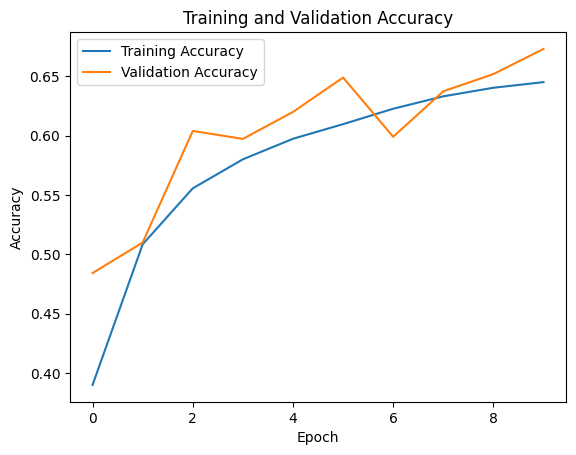

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


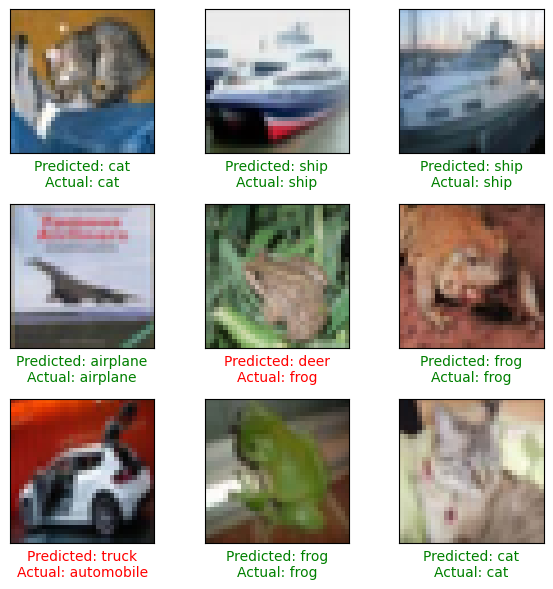

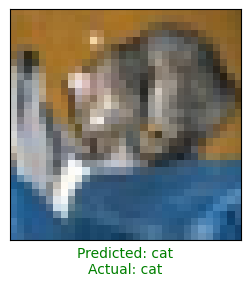

airplane: 8.16%
automobile: 2.52%
bird: 10.44%
cat: 29.20%
deer: 0.20%
dog: 9.82%
frog: 1.46%
horse: 3.66%
ship: 21.87%
truck: 12.66%


In [7]:
# Get class names for CIFAR-10
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions
predictions = model.predict(x_test)

# Create a function to plot images with their predictions
def plot_image_prediction(i, predictions_array, true_label, img):
    predictions_array = tf.nn.softmax(predictions_array)
    predicted_label = np.argmax(predictions_array)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    color = 'green' if predicted_label == true_label[0] else 'red'
    
    plt.xlabel(f"Predicted: {class_names[predicted_label]}\n"
               f"Actual: {class_names[true_label[0]]}", 
               color=color)

# Plot a grid of predictions
def plot_predictions(num_rows=3, num_cols=3):
    num_images = num_rows * num_cols
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i+1)
        plot_image_prediction(i, predictions[i], y_test[i], x_test[i])
    
    plt.tight_layout()
    plt.show()

# Show predictions
plot_predictions()

# To show prediction for a single image
sample_idx = 0  # Change this to look at different images
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
plot_image_prediction(sample_idx, predictions[sample_idx], y_test[sample_idx], x_test[sample_idx])
plt.show()

# Print detailed probabilities for the single image
probabilities = tf.nn.softmax(predictions[sample_idx])
for i in range(len(probabilities)):
    print(f"{class_names[i]}: {probabilities[i]*100:.2f}%")

In [8]:
single_prediction = model.predict(x_test[sample_idx:sample_idx+1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
